In [73]:
import pandas as pd
import os

file_path = '/Users/muntasirmahmud/Library/CloudStorage/OneDrive-UMBC/4. SciGlob/Panndora_456/Lab_pandora/Aug_23/Pandora291s1_Agam_20240824_L0_part0 2.txt'

base_name = os.path.basename(file_path)
csv_file_name = os.path.splitext(base_name)[0] + '.csv'

# Read the entire file
with open(file_path, 'r', encoding='latin1') as file:
    lines = file.readlines()

# Skip the initial 44 rows
#data_lines = lines[44:]
data_lines = lines

# Process each line to split into rows and columns
data_list = []
for line in data_lines:
    # Strip the newline character and split by tabs
    rows = line.strip().split('\t')
    for row in rows:
        # Split each row by spaces
        columns = row.split()
        data_list.append(columns)

# Convert the list of lists into a DataFrame
data1 = pd.DataFrame(data_list)
# Convert the necessary columns to numeric before saving
data1.iloc[:, 2:2077] = data1.iloc[:, 2:2077].apply(pd.to_numeric, errors='coerce')


# Define the column names
column_names = [
    'routine', 'time (yyyymmddThhmmssZ)', 'Routine count', 'Repetition count', 'measurement duration (s)',
    'Integration time [ms]', 'Number of cycles', 'Saturation index', 'filterwheel 1', 'filterwheel 2',
    'Pointing zenith angle (degree)', 'Zenith pointing mode', 'Pointing azimuth (degree)', 'Azimuth pointing mode',
    'Data processing type', 'Target distance [m]', 'Temperature at electronics board (C)', 'Unkonwn 1', 'Unknown 2',
    'Spectrometer control temperature (C)', 'Auxiliary spectrometer temperature (C)', 'Temperature in head sensor (C)',
    'Humidity in head sensor (%)', 'Pressure in head sensor (hPa)', 'Scale factor for data', 'Uncertainty indicator'
] + [f'Mean pixel {i}' for i in range(1, 2053)]

# Assign column names to the DataFrame
data1.columns = column_names

save_folder = "/Users/muntasirmahmud/Library/CloudStorage/OneDrive-UMBC/4. SciGlob/Panndora_456/Lab_pandora/Aug_23/"

# # Save the DataFrame to a CSV file with the same name as the initial text file
data1.to_csv(os.path.join(save_folder, csv_file_name), index=False)

print(f"Data saved to {os.path.join(save_folder, csv_file_name)}")

Data saved to /Users/muntasirmahmud/Library/CloudStorage/OneDrive-UMBC/4. SciGlob/Panndora_456/Lab_pandora/Aug_23/Pandora291s1_Agam_20240824_L0_part0 2.csv


In [74]:
int_t_2_4_3 = (data1.iloc[0, 26:2074] - data1.iloc[1, 26:2074]) / 2.4
int_t_10_3 = (data1.iloc[2, 26:2074] - data1.iloc[3, 26:2074]) / 10
int_t_100_3 = (data1.iloc[4, 26:2074] - data1.iloc[5, 26:2074]) / 100
int_t_1000_3 = (data1.iloc[6, 26:2074] - data1.iloc[7, 26:2074]) / 1000
int_t_2000_3 = (data1.iloc[8, 26:2074] - data1.iloc[9, 26:2074]) / 2000
int_t_3000_3 = (data1.iloc[10, 26:2074] - data1.iloc[11, 26:2074]) / 3000
int_t_4000_3 = (data1.iloc[12, 26:2074] - data1.iloc[13, 26:2074]) / 4000

In [6]:
int_t_10_488nm = int_t_10

In [8]:
int_t_10_404nm = (data1.iloc[8, 26:2074] - data1.iloc[9, 26:2074]) / 10

In [10]:
int_t_10_445nm = (data1.iloc[8, 26:2074] - data1.iloc[9, 26:2074]) / 10

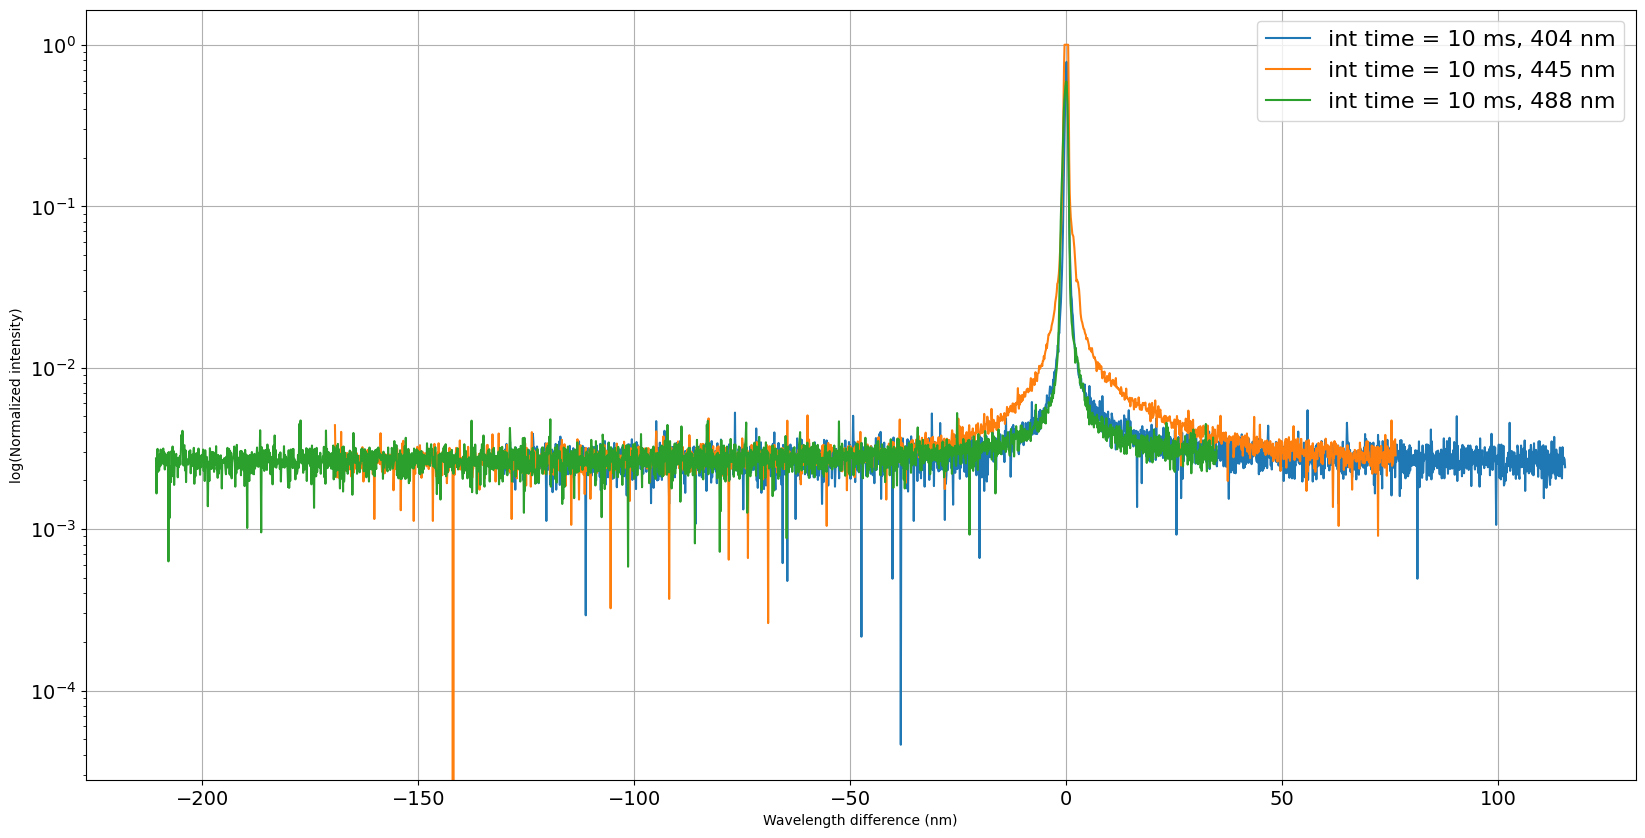

In [107]:
wavelength_404nm = np.arange(-130.08,115.64, 0.12)
wavelength_445nm = np.arange(-169.32,76.40, 0.12)
wavelength_488nm = np.arange(-210.76,34.96, 0.12)

In [105]:
wavelength_404nm = np.arange(-130.08,115.64, 0.12)
wavelength_445nm = np.arange(-169.32,76.40, 0.12)
wavelength_488nm = np.arange(-210.76,34.96, 0.12)
print(wavelength_404nm.shape)

(2048,)


# Aug 23

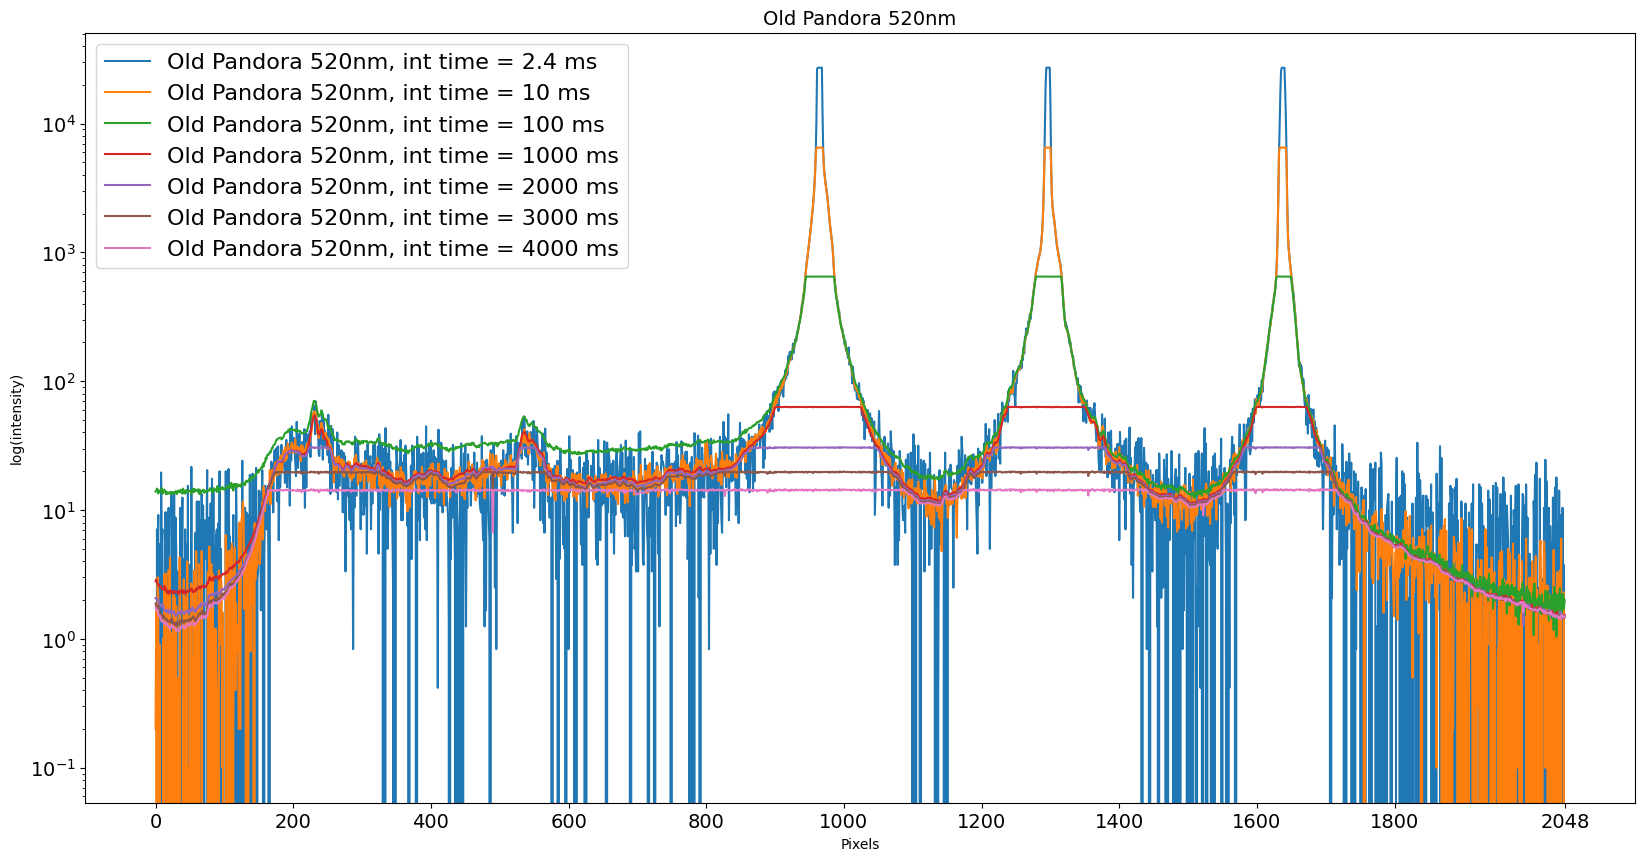

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# wavelength = np.linspace(277.1168, 542.8542, 2048)
# int_t_2_4 = (data1.iloc[0, 26:2074] - data1.iloc[1, 26:2074]) / 2.4
# int_t_10 = (data1.iloc[2, 26:2074] - data1.iloc[3, 26:2074]) / 10
# int_t_100 = (data1.iloc[4, 26:2074] - data1.iloc[5, 26:2074]) / 100
# int_t_1000 = (data1.iloc[6, 26:2074] - data1.iloc[7, 26:2074]) / 1000
# int_t_2000 = (data1.iloc[8, 26:2074] - data1.iloc[9, 26:2074]) / 2000
# int_t_3000 = (data1.iloc[10, 26:2074] - data1.iloc[11, 26:2074]) / 3000
# int_t_4000 = (data1.iloc[12, 26:2074] - data1.iloc[13, 26:2074]) / 4000
# int_t_2_4_2 = (data1.iloc[14, 26:2074] - data1.iloc[15, 26:2074]) / 2.4
# int_t_4000_2 = (data1.iloc[14, 26:2074] - data1.iloc[15, 26:2074]) / 4000

# Plot
plt.figure(figsize=(20, 10))
plt.yscale('log')
plt.plot(int_t_2_4_2, label='Old Pandora 520nm, int time = 2.4 ms')
plt.plot(int_t_10_2, label='Old Pandora 520nm, int time = 10 ms')
plt.plot(int_t_100_2, label='Old Pandora 520nm, int time = 100 ms')
plt.plot(int_t_1000_2, label='Old Pandora 520nm, int time = 1000 ms')
plt.plot(int_t_2000_2, label='Old Pandora 520nm, int time = 2000 ms')
plt.plot(int_t_3000_2, label='Old Pandora 520nm, int time = 3000 ms')
plt.plot(int_t_4000_2, label='Old Pandora 520nm, int time = 4000 ms')

plt.xticks([0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2048], [0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2048])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xlim(0, 2048)
plt.xlabel('Pixels')
plt.ylabel('log(intensity)')
plt.legend(fontsize=16)
plt.title('Old Pandora 520nm', fontsize=14)
# Save the plot to a file
plt.savefig('/Users/muntasirmahmud/Library/CloudStorage/OneDrive-UMBC/4. SciGlob/Panndora_456/Lab_pandora/Aug_23/Old Pandora 520nm_log.png', dpi=300, bbox_inches='tight')

plt.show()

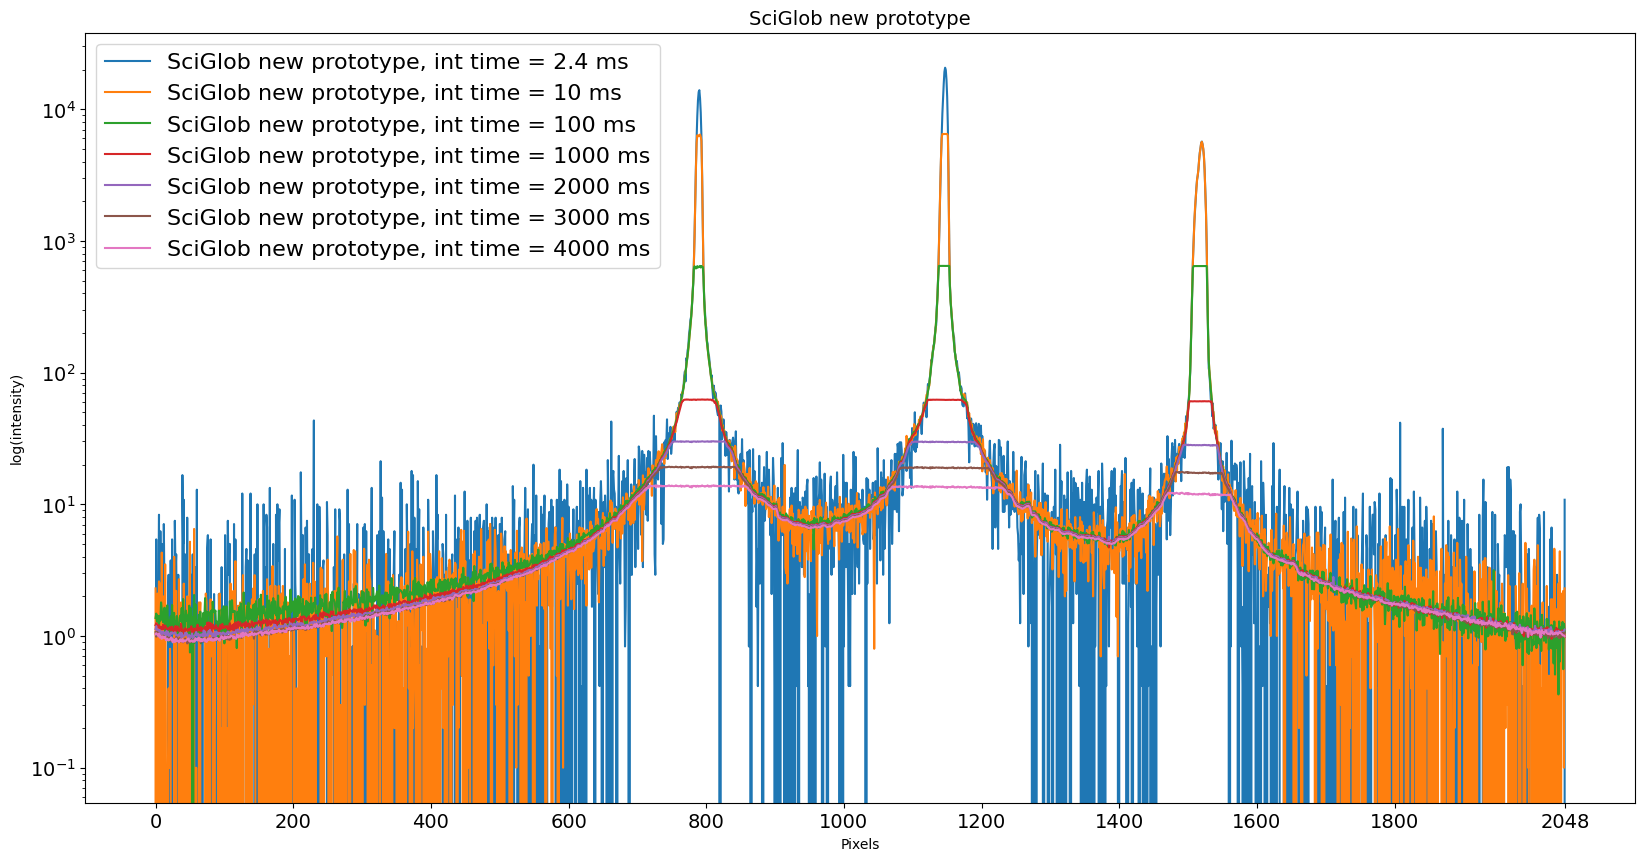

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(20, 10))
plt.yscale('log')
plt.plot(int_t_2_4, label='SciGlob new prototype, int time = 2.4 ms')
plt.plot(int_t_10, label='SciGlob new prototype, int time = 10 ms')
plt.plot(int_t_100, label='SciGlob new prototype, int time = 100 ms')
plt.plot(int_t_1000, label='SciGlob new prototype, int time = 1000 ms')
plt.plot(int_t_2000, label='SciGlob new prototype, int time = 2000 ms')
plt.plot(int_t_3000, label='SciGlob new prototype, int time = 3000 ms')
plt.plot(int_t_4000, label='SciGlob new prototype, int time = 4000 ms')

plt.xticks([0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2048], [0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2048])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xlim(0, 2048)
plt.xlabel('Pixels')
plt.ylabel('log(intensity)')
plt.legend(fontsize=16)
plt.title('SciGlob new prototype', fontsize=14)
# Save the plot to a file
plt.savefig('/Users/muntasirmahmud/Library/CloudStorage/OneDrive-UMBC/4. SciGlob/Panndora_456/Lab_pandora/Aug_23/SciGlob new prototype_log.png', dpi=300, bbox_inches='tight')

plt.show()

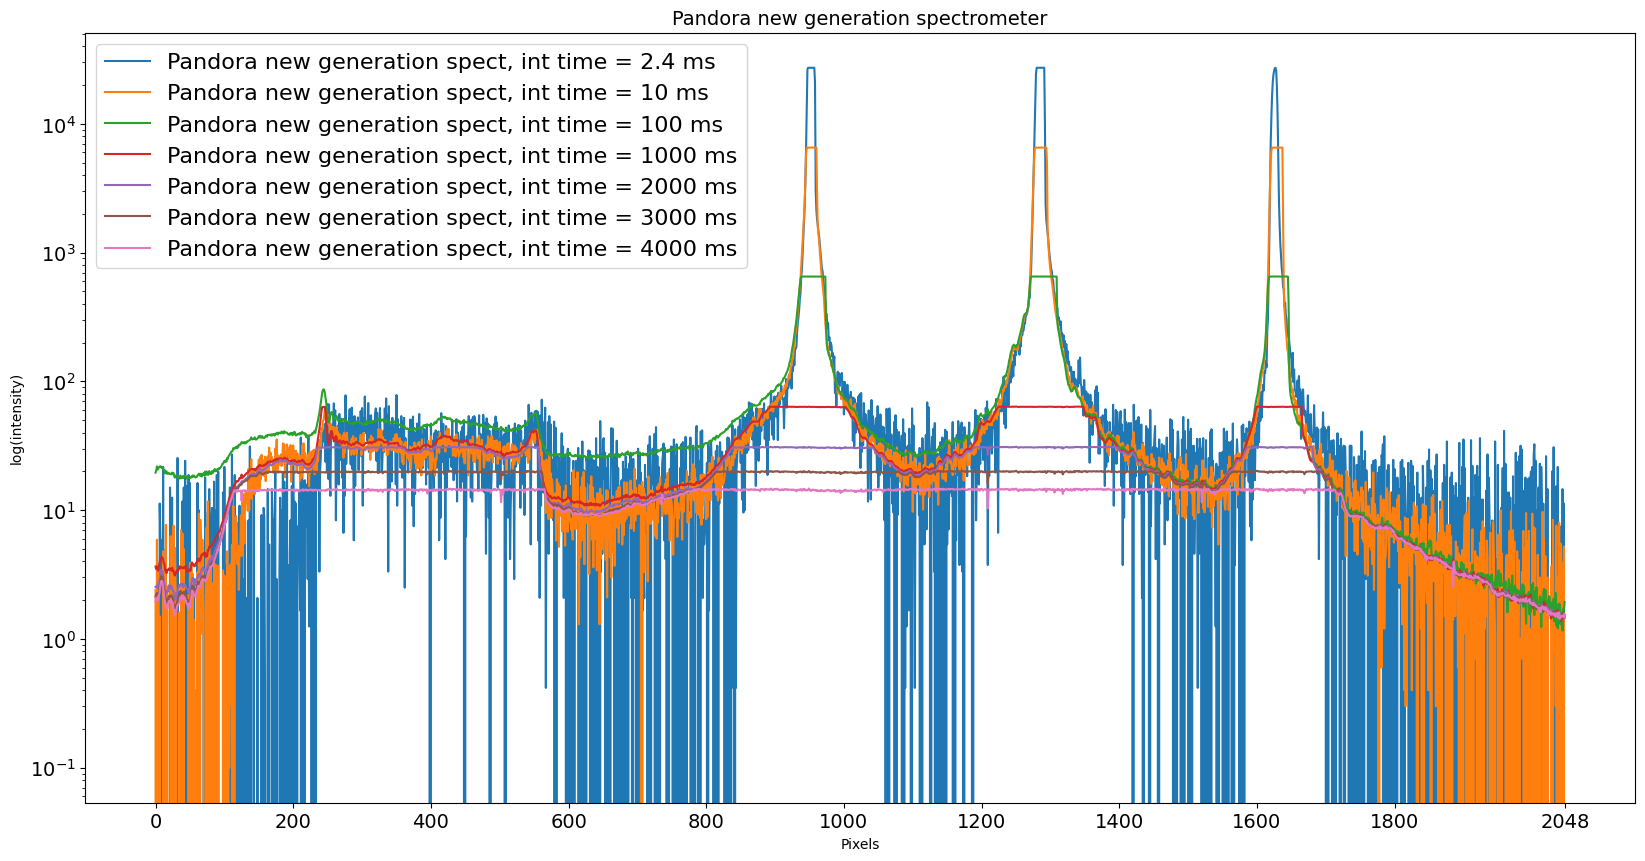

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(20, 10))
plt.yscale('log')
plt.plot(int_t_2_4_3, label='Pandora new generation spect, int time = 2.4 ms')
plt.plot(int_t_10_3, label='Pandora new generation spect, int time = 10 ms')
plt.plot(int_t_100_3, label='Pandora new generation spect, int time = 100 ms')
plt.plot(int_t_1000_3, label='Pandora new generation spect, int time = 1000 ms')
plt.plot(int_t_2000_3, label='Pandora new generation spect, int time = 2000 ms')
plt.plot(int_t_3000_3, label='Pandora new generation spect, int time = 3000 ms')
plt.plot(int_t_4000_3, label='Pandora new generation spect, int time = 4000 ms')

plt.xticks([0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2048], [0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2048])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xlim(0, 2048)
plt.xlabel('Pixels')
plt.ylabel('log(intensity)')
plt.legend(fontsize=16)
plt.title('Pandora new generation spectrometer', fontsize=14)
# Save the plot to a file
plt.savefig('/Users/muntasirmahmud/Library/CloudStorage/OneDrive-UMBC/4. SciGlob/Panndora_456/Lab_pandora/Aug_23/Pandora new generation spectrometer_log.png', dpi=300, bbox_inches='tight')

plt.show()

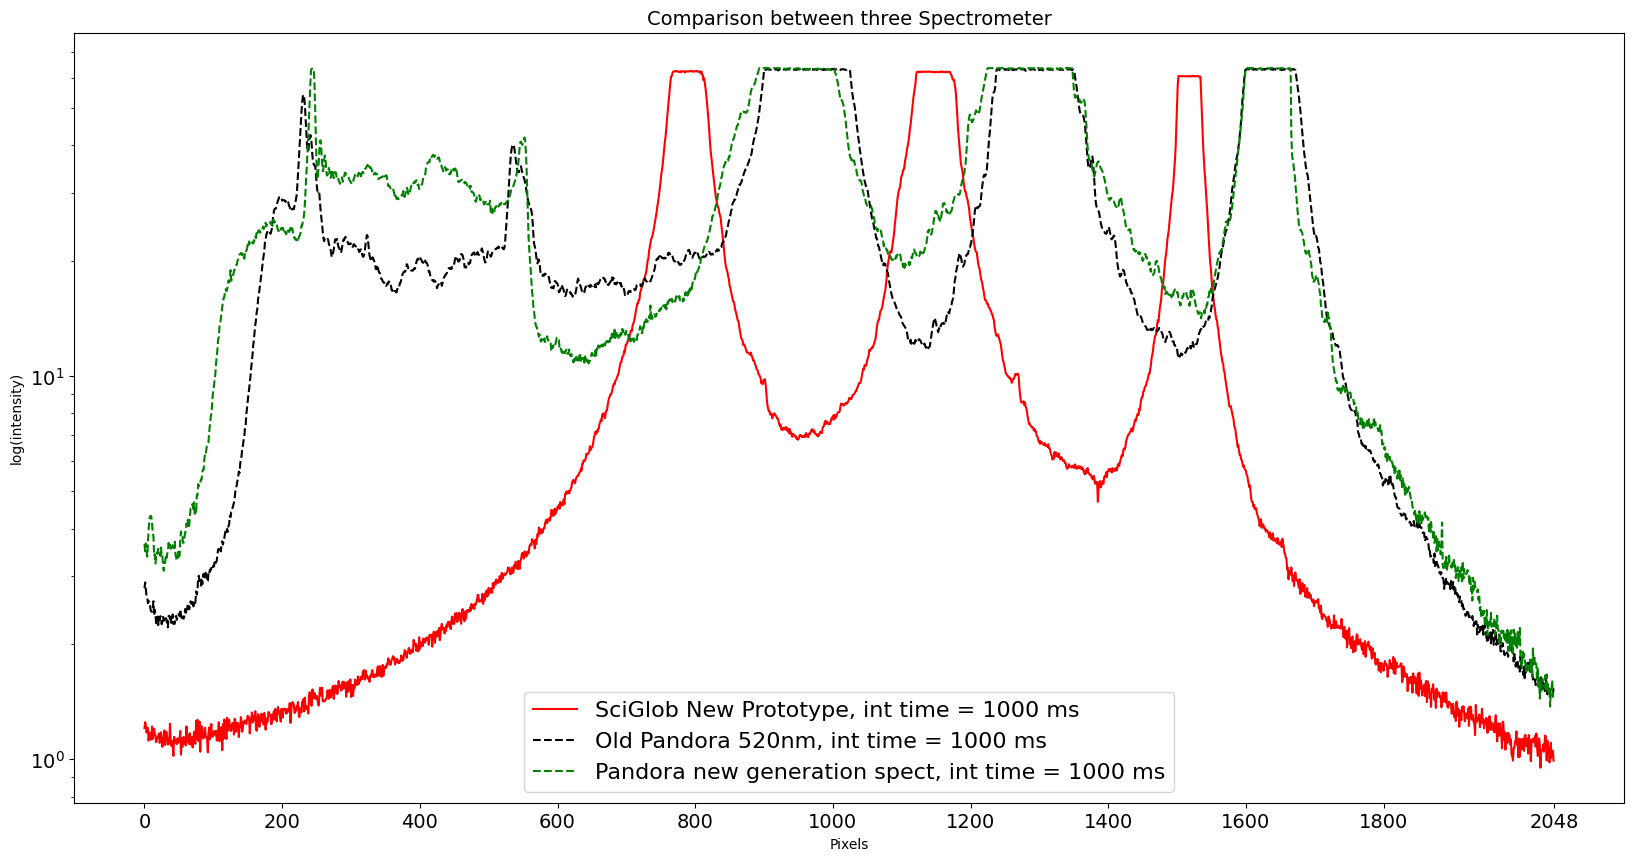

In [90]:
# Plot
plt.figure(figsize=(20, 10))
plt.yscale('log')
#plt.plot(int_t_2_4, 'r-', label='SciGlob New Prototype, int time = 2.4 ms')
#plt.plot(int_t_10, 'r-', label='SciGlob New Prototype, int time = 10 ms')
#plt.plot(int_t_100, 'r-', label='SciGlob New Prototype, int time = 100 ms')
plt.plot(int_t_1000, 'r-', label='SciGlob New Prototype, int time = 1000 ms')
#plt.plot(int_t_2000, 'r-', label='SciGlob New Prototype, int time = 2000 ms')
#plt.plot(int_t_3000, 'r-', label='SciGlob New Prototype, int time = 3000 ms')
#plt.plot(int_t_4000, 'r-', label='SciGlob New Prototype, int time = 4000 ms')

#plt.plot(int_t_2_4_2, 'k--', label='Old Pandora 520nm, int time = 2.4 ms')
#plt.plot(int_t_10_2, 'k--', label='Old Pandora 520nm, int time = 10 ms')
#plt.plot(int_t_100_2, 'k--', label='Old Pandora 520nm, int time = 100 ms')
plt.plot(int_t_1000_2, 'k--', label='Old Pandora 520nm, int time = 1000 ms')
#plt.plot(int_t_2000_2, 'k--', label='Old Pandora 520nm, int time = 2000 ms')
#plt.plot(int_t_3000_2, 'k--', label='Old Pandora 520nm, int time = 3000 ms')
#plt.plot(int_t_4000_2, 'k--', label='Old Pandora 520nm, int time = 4000 ms')

#plt.plot(int_t_2_4_3, 'g--', label='Pandora new generation spect, int time = 2.4 ms')
#plt.plot(int_t_10_3, 'g--', label='Pandora new generation spect, int time = 10 ms')
#plt.plot(int_t_100_3, 'g--', label='Pandora new generation spect, int time = 100 ms')
plt.plot(int_t_1000_3, 'g--', label='Pandora new generation spect, int time = 1000 ms')
#plt.plot(int_t_2000_3, 'g--', label='Pandora new generation spect, int time = 2000 ms')
#plt.plot(int_t_3000_3, 'g--', label='Pandora new generation spect, int time = 3000 ms')
#plt.plot(int_t_4000_3, 'g--', label='Pandora new generation spect, int time = 4000 ms')

#plt.yscale('log')
plt.xticks([0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2048], [0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2048])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xlim(0, 2048)
plt.xlabel('Pixels')
plt.ylabel('log(intensity)')
plt.legend(fontsize=16)
plt.title('Comparison between three Spectrometer', fontsize=14)
# Save the plot to a file
plt.savefig('/Users/muntasirmahmud/Library/CloudStorage/OneDrive-UMBC/4. SciGlob/Panndora_456/Lab_pandora/Aug_23/comp_int_1000ms.png', dpi=300, bbox_inches='tight')

plt.show()